In [1]:
from importlib import reload
from src import parsing
from src import model_path
from src import models_path
from src import model_goal
from src import models_goal
from src import model_interface
from src import visualization
from src import util
from src import config
reload(parsing)
reload(model_path)
reload(models_path)
reload(model_goal)
reload(models_goal)
reload(model_interface)
reload(visualization)
reload(util)
reload(config)

import matplotlib.pyplot as plt

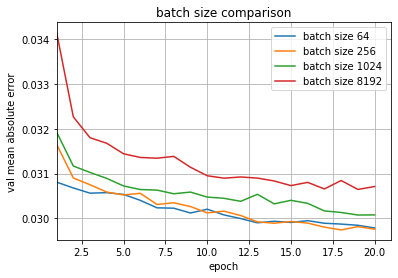

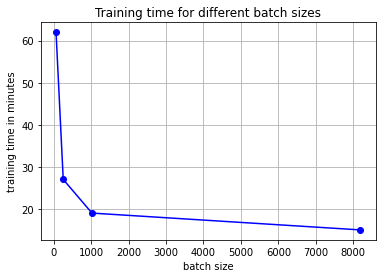

In [24]:
# batch size comparison
reload(visualization)

history_files = ['path_simple_lstm_batch_64', 'path_simple_lstm_batch_256', 'path_simple_lstm_batch_1024', 'path_simple_lstm_batch_8192']
history_dicts = []
for history_file in history_files:
    history_dicts.append(model_interface.load_history(history_file))

visualization.draw_losses(
    'val_mean_absolute_error',
    'val mean absolute error',
    history_dicts,
    ['batch size 64', 'batch size 256', 'batch size 1024', 'batch size 8192'],
    'batch size comparison',
    save_file='batch_size_comparison_lstm_val_mean_absolute_error',
    )

# visualization.draw_losses(
#     'mean_absolute_error',
#     'mean absolute error',
#     history_dicts,
#     ['batch size 64', 'batch size 256', 'batch size 1024', 'batch size 8192'],
#     'batch size comparison',
#     save_file='batch_size_comparison_lstm_mean_absolute_error',
#     )


# training time for different batch sizes
batch_sizes = [8192, 1024, 256, 64]
training_time = [15, 19, 27, 62]

fig, ax = plt.subplots()
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.plot(batch_sizes, training_time, 'bo-')
plt.xlabel('batch size')
plt.ylabel('training time in minutes')
plt.title('Training time for different batch sizes')
plt.savefig(f"batch_size_comparison_lstm_training_time.pdf")
plt.show()


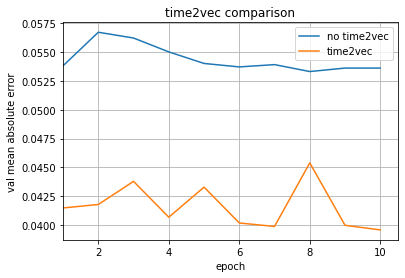

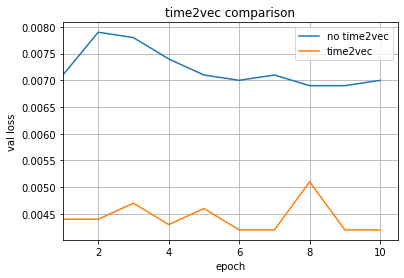

In [5]:
# comparison with time2vec
history_files = ['path_no2vec', 'path_yes2vec']
history_dicts = []
for history_file in history_files:
    history_dicts.append(model_interface.load_history(history_file))

visualization.draw_histories(
    'val_mean_absolute_error',
    'val mean absolute error',
    history_dicts,
    ['no time2vec', 'time2vec'],
    'time2vec comparison',
    save_file='time2vec_comparison'
)

visualization.draw_histories(
    'val_loss',
    'val loss',
    history_dicts,
    ['no time2vec', 'time2vec'],
    'time2vec comparison',
    save_file='time2vec_comparison_val_loss'
)

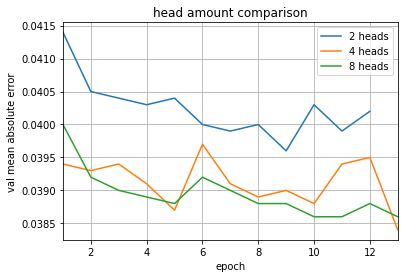

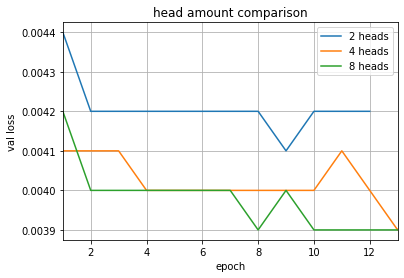

In [9]:
# compare head amount
history_files = ['tf_head_2', 'path_transformerk_l', 'tf_head_8']
history_dicts = []
for history_file in history_files:
    history_dicts.append(model_interface.load_history(history_file))

visualization.draw_histories(
    'val_mean_absolute_error',
    'val mean absolute error',
    history_dicts,
    ['2 heads', '4 heads', '8 heads'],
    'head amount comparison',
    max_x=13,
    save_file='head_amount_comparison'
)

visualization.draw_histories(
    'val_loss',
    'val loss',
    history_dicts,
    ['2 heads', '4 heads', '8 heads'],
    'head amount comparison',
    max_x=13,
    save_file='head_amount_comparison_val_loss'
)


In [12]:
## generate model numbers/graphs
from src import transformer_k
reload(transformer_k)

train_data, eval_data, test_data = parsing.load_processed_data("medium_aa.csv")

m = model_path.ModelPath(uses_goal=False)
input_shape = train_data[0].shape
input_shape = (input_shape[1], input_shape[2])
model = transformer_k.build_model(
    input_shape,
    head_size=64, # 256
    num_heads=4, # 4
    ff_dim=256, # 4
    num_transformer_blocks=2, # 4
    mlp_units=1, # [128]
    mlp_dropout=0.4, # 0.4
    dropout=0.3, # 0.25
    time2vec_dim=3, # 3
    bayesian_dropout=True,
)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 40, 2)]      0                                            
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, 40, 6)        12          input_2[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 40, 8)        0           input_2[0][0]                    
                                                                 time_distributed_1[0][0]         
__________________________________________________________________________________________________
layer_normalization_1 (LayerNor (None, 40, 8)        16          concatenate_1[0][0]        

In [13]:
from src import inception
reload(inception)

m = model_goal.ModelGoal()
model_name = 'goal_inception_e'

model = inception.InceptionTime(
    depth=3,
    # nb_filters=64,
    # kernel_size=81,
    use_residual=True,
).build(
    input_shape=input_shape,
    number_output_classes=config.GOAL_GRID_SIZE**2
)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 40, 2)]      0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 40, 32)       64          input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 40, 2)        0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 40, 32)       40960       conv1d[0][0]                     
____________________________________________________________________________________________